**Scrapping Data**

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00


Deskripsi: Memanggil Google Play Store Untuk Menarik Data

In [2]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

Deskripsi: Pandas berguna untuk membaca review G.Maps Shoppe

In [3]:
from google_play_scraper import reviews, Sort

# Ganti app_id menjadi Shopee
app_id = 'com.shopee.id'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST,
                filter_score_with=None, filter_device_with=None,
                continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

# Ambil data ulasan Shopee
reviews_data, continuation_token = get_reviews(app_id)

if reviews_data is not None:
    print("Jumlah ulasan:", len(reviews_data))
    if len(reviews_data) > 0:
        print("Contoh ulasan:")
        print(reviews_data[0])
else:
    print("Tidak dapat mengambil ulasan.")


Jumlah ulasan: 10000
Contoh ulasan:
{'reviewId': 'e2647848-be03-4489-a97b-40ef531fb62e', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'shoppe terbaik', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '3.61.28', 'at': datetime.datetime(2025, 11, 29, 6, 46, 16), 'replyContent': 'Hai kak Rudy Rudy, makasih ya untuk bintangnya. semoga kakak suka dan nyaman belanja di shopee. jangan lupa juga cek promo belanja, sebelum checkout di shopee ya kak. kalau ada kendala, kakak bisa chat aku di DM IG @shopee_id aja. Be happy^MK', 'repliedAt': datetime.datetime(2025, 11, 29, 7, 25, 13), 'appVersion': '3.61.28'}


Deskripsi: Semua data ulasan di Shoppee 17,5 jt, untuk mengambil semua datanya tidak bisa sekaligus, namun harus secara terpisah. Untuk contoh case ini jumlah ulasan yang ditarik hanya 10000

In [5]:
import csv

def simpan_ulasan_ke_csv(data_ulasan, nama_file="ulasan_shopee.csv"):
    if not data_ulasan:
        print("Tidak ada ulasan yang bisa disimpan.")
        return

    kolom = ["Review ID", "Username", "Rating", "Review Text", "Date"]

    try:
        with open(nama_file, "w", encoding="utf-8", newline="") as berkas:
            tulis = csv.writer(berkas)
            tulis.writerow(kolom)

            for item in data_ulasan:
                baris = [
                    item.get("reviewId"),
                    item.get("userName"),
                    item.get("score"),
                    item.get("content"),
                    item.get("at")
                ]
                tulis.writerow(baris)

        print(f"File berhasil dibuat: {nama_file}")

    except Exception as e:
        print("Gagal menyimpan data:", e)


# Panggil fungsi
simpan_ulasan_ke_csv(reviews_data)


File berhasil dibuat: ulasan_shopee.csv


In [8]:
import pandas as pd

# Membaca file hasil scraper Shopee
df = pd.read_csv("ulasan_shopee.csv", encoding="utf-8")

# Menampilkan tabel secara langsung
df


,Review ID,Username,Rating,Review Text,Date
0,e2647848-be03-4489-a97b-40ef531fb62e,Pengguna Google,5,shoppe terbaik,2025-11-29 06:46:16
1,ff5c25d1-ff54-4371-9cb5-b75c2ce0f2af,Pengguna Google,4,"aplikasi nya agak lelet dan sering ngelek, bol...",2025-11-29 06:44:48
2,2b31e9bb-0901-4e45-89bb-67712998e48f,Pengguna Google,5,bagus,2025-11-29 06:43:47
3,65778863-ea24-494f-b382-8b1d7c4e3738,Pengguna Google,5,terbaik,2025-11-29 06:42:33
4,2b586d36-4db6-4477-8068-b49c2f92e359,Pengguna Google,5,aku tuh butuh banget shopee karna aku bisa hemat,2025-11-29 06:42:14
...,...,...,...,...,...
9995,1c1dfa65-6bd2-47a7-8132-07535e680e9e,Yunan Apiyo,5,aplikasi yg sangat bagus,2025-11-21 22:38:24
9996,e52ba9f2-f972-469d-bcc7-46f568c1959a,Narti,5,membantu belanja secara online,2025-11-21 22:38:03
9997,a32268e9-51a3-4864-8d66-2b54dfff46d4,Elsi love nora,5,"bagus banget, semenjak ada shoope jadi males b...",2025-11-21 22:36:05
9998,2768d49e-0a1b-47b4-bbda-4abe639ef5a8,Wahyu Sugono,5,shopee teratur dalam setiap step promonya bagu...,2025-11-21 22:34:26


**Pre-Processing**

In [9]:
# Membaca file ulasan Shopee
df = pd.read_csv("ulasan_shopee.csv", encoding="utf-8")

# Menampilkan 5 data awal
df.head()


,Review ID,Username,Rating,Review Text,Date
0,e2647848-be03-4489-a97b-40ef531fb62e,Pengguna Google,5,shoppe terbaik,2025-11-29 06:46:16
1,ff5c25d1-ff54-4371-9cb5-b75c2ce0f2af,Pengguna Google,4,"aplikasi nya agak lelet dan sering ngelek, bol...",2025-11-29 06:44:48
2,2b31e9bb-0901-4e45-89bb-67712998e48f,Pengguna Google,5,bagus,2025-11-29 06:43:47
3,65778863-ea24-494f-b382-8b1d7c4e3738,Pengguna Google,5,terbaik,2025-11-29 06:42:33
4,2b586d36-4db6-4477-8068-b49c2f92e359,Pengguna Google,5,aku tuh butuh banget shopee karna aku bisa hemat,2025-11-29 06:42:14


**Cleaning Colomn**

In [24]:
df = pd.read_csv("ulasan_shopee.csv", encoding="utf-8")

# Samakan nama kolom agar konsisten
df = df.rename(columns={
    "Review ID": "ReviewID",
    "Review Id": "ReviewID",
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText",
})

# Ambil hanya 2 kolom
df2 = df[["Rating", "ReviewText"]]

df2.head()


,Rating,ReviewText
0,5,shoppe terbaik
1,4,"aplikasi nya agak lelet dan sering ngelek, bol..."
2,5,bagus
3,5,terbaik
4,5,aku tuh butuh banget shopee karna aku bisa hemat


In [25]:
import pandas as pd

# Data kamu
df = pd.read_csv("ulasan_shopee.csv", encoding="utf-8")

# Samakan kolom
df = df.rename(columns={
    "Review ID": "ReviewID",
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText"
})

# Ambil hanya kolom rating & review
df2 = df[["Rating", "ReviewText"]]

# ===== CEK TIPE ULASAN =====

# 1. Pengguna yang memberi rating + komentar (review tidak kosong)
df2["has_comment"] = df2["ReviewText"].notna() & (df2["ReviewText"].astype(str).str.strip() != "")

jumlah_komentar = df2["has_comment"].sum()

# 2. Pengguna yang hanya memberi rating (review kosong)
jumlah_rating_saja = len(df2) - jumlah_komentar

# 3. Hitung persentase
total = len(df2)

persentase_rating_saja = (jumlah_rating_saja / total) * 100
persentase_rating_dan_komentar = (jumlah_komentar / total) * 100

# ===== HASIL =====
print("Total data:", total)
print(f"Rating saja: {jumlah_rating_saja} ({persentase_rating_saja:.2f}%)")
print(f"Rating + komentar: {jumlah_komentar} ({persentase_rating_dan_komentar:.2f}%)")


Total data: 10000
Rating saja: 0 (0.00%)
Rating + komentar: 10000 (100.00%)


/tmp/ipython-input-3643849219.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["has_comment"] = df2["ReviewText"].notna() & (df2["ReviewText"].astype(str).str.strip() != "")


Deskripsi: Total data yang di tarik 10000, dari keseluruhan yang memberika rating+review 100% (teman teman bisa download di file ulasan_shoppe.csv untuk mengecek

**Mengetahui Hal Apa Yang Sering Dibahas (BERT)**

In [26]:
# ============================================
# 1. INSTALL LIBRARY (Jalankan sekali di Colab)
# ============================================
!pip install bertopic[visualization] sentence-transformers clean-text
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 13.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=251c3d01c83bb0e5ca87229d5266372b2fddffd817f0279329fe4b0fb36394d7
  Stored in directory: /root/.cache/pip/wheels/e0/8c/e0/294d2e4ea0e55792bfc99b6b263e4a0511443da7b69af67688
Successfully built emoji


In [29]:
# ============================================
# 2. IMPORT MODULE
# ============================================
import pandas as pd
import re
import emoji
from cleantext import clean
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer


In [30]:
# ============================================
# 3. LOAD DATA & AMBIL REVIEW SAJA
# ============================================
df = pd.read_csv("ulasan_shopee.csv", encoding="utf-8")

# Samakan nama kolom agar konsisten
df = df.rename(columns={
    "Review ID": "ReviewID",
    "Review Id": "ReviewID",
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText",
})

# Ambil review text saja
df = df[["ReviewText"]]

# Drop review kosong
df = df.dropna(subset=["ReviewText"])


In [31]:
# ============================================
# 4. CLEANING TEKS
# ============================================

def cleaning(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)            # hapus URL
    text = emoji.replace_emoji(text, replace="")           # hapus emoji
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)            # hapus simbol
    text = re.sub(r"\s+", " ", text).strip()               # rapikan spasi
    return text

df["clean_text"] = df["ReviewText"].apply(cleaning)

documents = df["clean_text"].tolist()


In [32]:
# ============================================
# 5. LOAD EMBEDDING MODEL
# ============================================
embedding_model = SentenceTransformer("distiluse-base-multilingual-cased-v1")


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Deskripsi: Loading Model BERT

In [33]:
# ============================================
# 6. TRAIN BERTopic
# ============================================
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="multilingual",
    calculate_probabilities=True,
    verbose=True
)

topics, probabilities = topic_model.fit_transform(documents)


2025-11-30 07:16:33,588 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2025-11-30 07:22:41,790 - BERTopic - Embedding - Completed ✓
2025-11-30 07:22:41,792 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-30 07:23:35,808 - BERTopic - Dimensionality - Completed ✓
2025-11-30 07:23:35,810 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-30 07:23:54,629 - BERTopic - Cluster - Completed ✓
2025-11-30 07:23:54,640 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-30 07:23:54,929 - BERTopic - Representation - Completed ✓


Deskripsi: Train Topic

In [34]:
# ============================================
# 7. LIHAT TOPIK
# ============================================
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2544,-1_di_paket_shopee_saya,"[di, paket, shopee, saya, pengiriman, bisa, ny...",[aplikasi yg sangat bagus dan memudahkan untuk...
1,0,418,0_bagus_bagusd_bagusas_bagud,"[bagus, bagusd, bagusas, bagud, baggus, lmbat,...","[bagus, bagus, bagus]"
2,1,370,1_mantap_mantep_mantaf_mantp,"[mantap, mantep, mantaf, mantp, appo, lek, dac...","[mantap, mantap, mantap]"
3,2,231,2_aplikasi_aplikasinya_ini_berguna,"[aplikasi, aplikasinya, ini, berguna, berat, m...","[aplikasi bagus, aplikasi bagus, aplikasi bagus]"
4,3,231,3_sesuai_barang_pesanan_dgn,"[sesuai, barang, pesanan, dgn, terlalu, bagus,...",[barang nya sesuai pesanan datang nya tepat wa...
...,...,...,...,...,...
180,179,11,179_pelayanan_pelayanannya_bagus_coba,"[pelayanan, pelayanannya, bagus, coba, buruk, ...","[pelayanan bagus, pelayanan bagus, pelayanan b..."
181,180,11,180_proses_prosesnya_dikehendaki_pengerjaan,"[proses, prosesnya, dikehendaki, pengerjaan, p...",[sangat membantu dalam proses pembelian produk...
182,181,10,181_apliksi_gat_iyang_sa,"[apliksi, gat, iyang, sa, aps, zonk, mantull, ...","[bagus pokoknya mantull dehh, sa gat bagus sek..."
183,182,10,182_update_tampilannya_lag_susah,"[update, tampilannya, lag, susah, soalnya, kli...",[sukaa bgt sm apknya apalagi utk aku sbg affil...


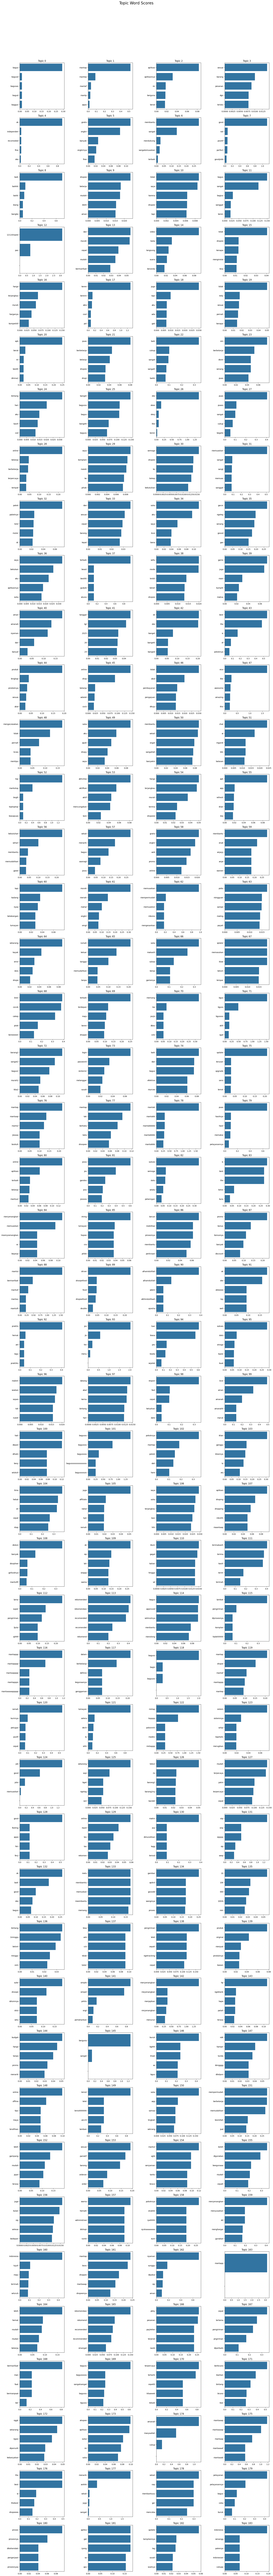

In [39]:
# ============================================
# VISUALISASI TOP WORDS PER TOPIC (BERTopic)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ambil semua topik & kata
topics = topic_model.get_topics()

# Hilangkan topic -1 (outlier)
topics = {topic: words for topic, words in topics.items() if topic != -1}

# Dapatkan jumlah topik
num_topics = len(topics)

# Grid layout
cols = 4  # jumlah kolom (ubah sesuai keinginan)
rows = math.ceil(num_topics / cols)

plt.figure(figsize=(20, rows * 4))

for i, (topic, words) in enumerate(topics.items()):
    # Ambil top 5 kata per topik
    top_words = words[:5]
    labels = [w[0] for w in top_words]
    values = [w[1] for w in top_words]

    plt.subplot(rows, cols, i + 1)
    sns.barplot(x=values, y=labels)
    plt.title(f"Topic {topic}", fontsize=12)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Topic Word Scores", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


Deskripsi: Visualisasi Topic/Kata yang dikomentari orang-orang total topik ada 183, namun paling dominan berada di topik 0-5 terkait pemesanan barang, gratis ongkir, dan aplikasi yang recommended untuk e-commerce

In [36]:
# ============================================
# 9. VISUALISASI TOPIK (INTERAKTIF)
# ============================================
topic_model.visualize_topics()


In [37]:
# ============================================
# 11. SAVE HASIL TOPIK
# ============================================
df["topic"] = topics
df.to_csv("hasil_topik_shopee.csv", index=False)


**Training and Testing Data + Confusion Matrix**

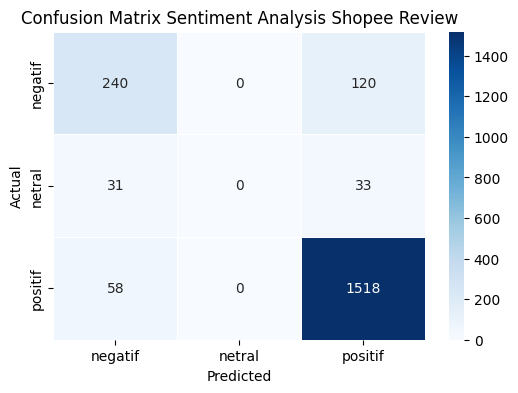


=== Classification Report ===
              precision    recall  f1-score   support

     negatif       0.73      0.67      0.70       360
      netral       0.00      0.00      0.00        64
     positif       0.91      0.96      0.94      1576

    accuracy                           0.88      2000
   macro avg       0.55      0.54      0.54      2000
weighted avg       0.85      0.88      0.86      2000



In [38]:
# ============================================
# CONFUSION MATRIX - 1 KODINGAN SAJA
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1. LOAD DATA ----
df = pd.read_csv("ulasan_shopee.csv", encoding="utf-8")

# Samakan kolom
df = df.rename(columns={
    "Review Text": "ReviewText",
    "content": "ReviewText",
    "Content": "ReviewText"
})

# Ambil kolom yang diperlukan
df = df[["ReviewText", "Rating"]].dropna()

# Jika rating ingin dijadikan sentimen:
# 1–2 = Negatif, 3 = Netral, 4–5 = Positif
def rating_to_sentiment(x):
    if x <= 2:
        return "negatif"
    elif x == 3:
        return "netral"
    else:
        return "positif"

df["Sentiment"] = df["Rating"].apply(rating_to_sentiment)

# ---- 2. PREPARE DATA ----
X = df["ReviewText"]
y = df["Sentiment"]

# TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 3. TRAIN MODEL ----
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ---- 4. PREDIKSI ----
y_pred = model.predict(X_test)

# ---- 5. CONFUSION MATRIX ----
cm = confusion_matrix(y_test, y_pred, labels=["negatif", "netral", "positif"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["negatif", "netral", "positif"],
            yticklabels=["negatif", "netral", "positif"],
            linewidths=.5, cmap="Blues")
plt.title("Confusion Matrix Sentiment Analysis Shopee Review")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- 6. LAPORAN KLASIFIKASI ----
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
